Two parameter fit using MCMC (you can maximize - Chi): Best fit (O_m and Ho) and corner graphs; Take Om range: [0,1.0]; Ho range [50,100]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.5 MB/s eta 0:00:00


100%|██████████| 5000/5000 [00:06<00:00, 753.24it/s]


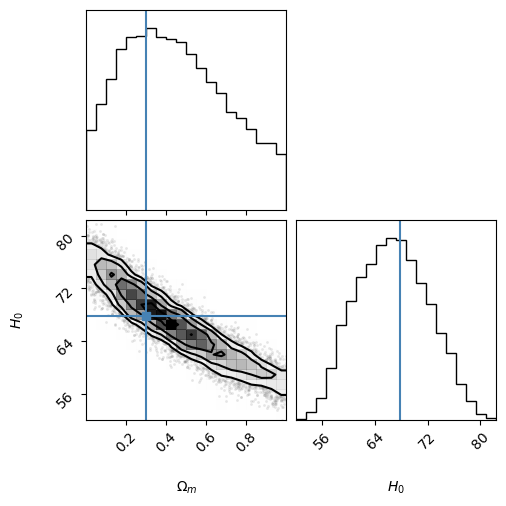

Best fit Omega_m: 0.445 ± 0.249
Best fit H_0: 66.735 ± 5.327


In [3]:
!pip install emcee corner
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Given data
z = np.array([0.07, 0.09, 0.12, 0.17, 0.1791, 0.1993, 0.2, 0.27, 0.28, 0.35, 0.3519, 0.3802, 0.4])
H = np.array([69, 69, 68.6, 83, 75, 75, 72.9, 77, 88.8, 82.7, 83, 83, 95])
sigma_H = np.array([19.6, 12, 26.2, 8, 4, 5, 29.6, 14, 36.6, 8.4, 14, 13.5, 17])

# Theoretical model
def H_th(z, Omega_m, H_0):
    Omega_Lambda = 1 - Omega_m
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Log likelihood function
def log_likelihood(theta, z, H, sigma_H):
    Omega_m, H_0 = theta
    H_theoretical = H_th(z, Omega_m, H_0)
    chi2 = np.sum(((H - H_theoretical) / sigma_H)**2)
    return -0.5 * chi2

# Log prior function
def log_prior(theta):
    Omega_m, H_0 = theta
    if 0 < Omega_m < 1.0 and 50 < H_0 < 100:
        return 0.0
    return -np.inf

# Log probability function
def log_probability(theta, z, H, sigma_H):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigma_H)

# Initial guess
initial = np.array([0.3, 67.8])
nwalkers = 32
ndim = len(initial)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(z, H, sigma_H))

# Running MCMC
sampler.run_mcmc(pos, 5000, progress=True)

# Flattening the samples and discarding the burn-in phase
samples = sampler.get_chain(discard=1000, thin=15, flat=True)

# Corner plot
fig = corner.corner(samples, labels=["$\\Omega_m$", "$H_0$"], truths=[initial[0], initial[1]])

plt.show()

# Best fit values and errors
best_fit_Omega_m = np.mean(samples[:, 0])
best_fit_H_0 = np.mean(samples[:, 1])
error_Omega_m = np.std(samples[:, 0])
error_H_0 = np.std(samples[:, 1])

print(f"Best fit Omega_m: {best_fit_Omega_m:.3f} ± {error_Omega_m:.3f}")
print(f"Best fit H_0: {best_fit_H_0:.3f} ± {error_H_0:.3f}")

100%|██████████| 5000/5000 [00:08<00:00, 599.86it/s]


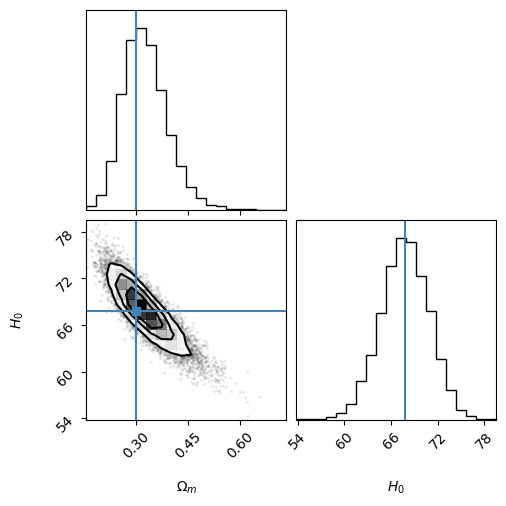

Best fit Omega_m: 0.328 ± 0.063
Best fit H_0: 67.794 ± 3.103


In [4]:
!pip install emcee corner
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Given data
z = np.array([0.07, 0.09, 0.12, 0.17, 0.179, 0.199, 0.20, 0.27, 0.28, 0.352, 0.38, 0.4, 0.4004, 0.425, 0.445, 0.47, 0.4783, 0.48, 0.593, 0.68, 0.75, 0.781, 0.8, 0.875, 0.88, 0.9, 1.037, 1.3, 1.363, 1.43, 1.53, 1.75, 1.965])
Hz = np.array([69.0, 69, 68.6, 83, 75, 75, 72.9, 77, 88.8, 83, 83, 95, 77, 87.1, 89.2, 89, 80.9, 97, 104, 92, 98.8, 105, 113.1, 125, 90, 117, 154, 168, 160, 177, 140, 202, 186.5])
sigma_Hz = np.array([19.6, 12, 26.2, 8, 4, 5, 29.6, 14, 36.6, 14, 13.5, 17, 10.2, 11.2, 12.9, 49.6, 9, 62, 13, 8, 33.6, 12, 15.1, 17, 40, 23, 20, 20, 33.6, 18, 14, 40, 50.4])

# Explanation:
# - Importing necessary libraries for numerical operations, plotting, and MCMC sampling.
# - Extracting redshift (z), Hubble parameter measurements (Hz), and their uncertainties (sigma_Hz) from Table II.

## Define Theoretical Model and Chi-Squared Function
# Theoretical model
def H_th(z, Omega_m, H_0):
    Omega_Lambda = 1 - Omega_m
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Chi-squared function
def chi_squared(Omega_m, H_0, z, H, sigma_H):
    H_theoretical = H_th(z, Omega_m, H_0)
    chi2 = np.sum(((H - H_theoretical) / sigma_H)**2)
    return chi2

# Explanation:
# - H_th calculates the theoretical H(z) for a flat ΛCDM model.
# - chi_squared calculates the chi-squared value based on the observed and theoretical H(z) values.

## Define Log-Likelihood, Log-Prior, and Log-Probability Functions
# Log likelihood function
def log_likelihood(theta, z, H, sigma_H):
    Omega_m, H_0 = theta
    return -0.5 * chi_squared(Omega_m, H_0, z, H, sigma_H)

# Log prior function
def log_prior(theta):
    Omega_m, H_0 = theta
    if 0 < Omega_m < 1.0 and 50 < H_0 < 100:
        return 0.0
    return -np.inf

# Log probability function
def log_probability(theta, z, H, sigma_H):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigma_H)

# Explanation:
# - log_likelihood calculates the log likelihood using the chi-squared value.
# - log_prior defines priors for Omega_m and H_0.
# - log_probability combines priors and likelihood to form the posterior probability.

## Initialize and Run MCMC Sampler
# Initial guess
initial = np.array([0.3, 67.8])
nwalkers = 32
ndim = len(initial)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(z, Hz, sigma_Hz))

# Running MCMC
sampler.run_mcmc(pos, 5000, progress=True)

# Explanation:
# - Initialize the MCMC sampler with initial guesses and run it to generate samples.

## Analyze and Visualize MCMC Results
# Flattening the samples and discarding the burn-in phase
samples = sampler.get_chain(discard=200, thin=15, flat=True)

# Corner plot
fig = corner.corner(samples, labels=["$\\Omega_m$", "$H_0$"], truths=[initial[0], initial[1]])
plt.show()

# Explanation:
# - Discard the burn-in samples and thin the chain for better convergence.
# - Use corner plot to visualize the posterior distributions of the parameters.

## Extract and Print Best-Fit Parameters
# Best fit values and errors
best_fit_Omega_m = np.mean(samples[:, 0])
best_fit_H_0 = np.mean(samples[:, 1])
error_Omega_m = np.std(samples[:, 0])
error_H_0 = np.std(samples[:, 1])

print(f"Best fit Omega_m: {best_fit_Omega_m:.3f} ± {error_Omega_m:.3f}")
print(f"Best fit H_0: {best_fit_H_0:.3f} ± {error_H_0:.3f}")

# Explanation:
# - Calculate the mean and standard deviation of the posterior samples for best-fit values and uncertainties.
# - Print the best-fit values and their errors.


Two parameter fit using Chi Square : Best fit (O_m and Ho) and contours; Take Om range: [0,1.0]; Ho range [50,100]

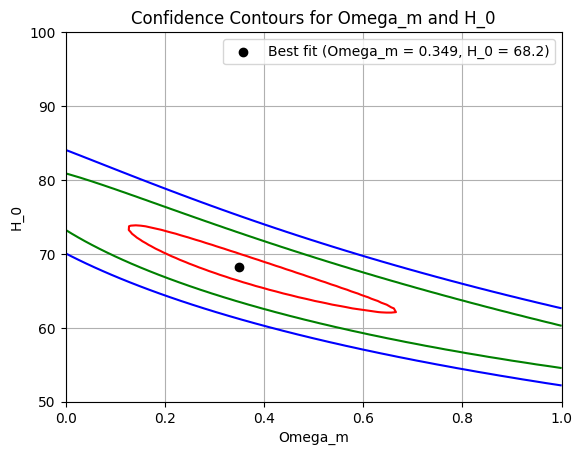

(0.3486745395485874, 68.20662906894567)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
z = np.array([0.07, 0.09, 0.12, 0.17, 0.1791, 0.1993, 0.2, 0.27, 0.28, 0.35, 0.3519, 0.3802, 0.4])
H = np.array([69, 69, 68.6, 83, 75, 75, 72.9, 77, 88.8, 82.7, 83, 83, 95])
sigma_H = np.array([19.6, 12, 26.2, 8, 4, 5, 29.6, 14, 36.6, 8.4, 14, 13.5, 17])

# Theoretical model
def H_th(z, Omega_m, H_0):
    Omega_Lambda = 1 - Omega_m
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Chi-square function
def chi_square(params):
    Omega_m, H_0 = params
    H_theoretical = H_th(z, Omega_m, H_0)
    chi2 = np.sum(((H - H_theoretical) / sigma_H)**2)
    return chi2

# Minimize chi-square to find the best fit Omega_m and H_0
initial_guess = [0.3, 67.8]
bounds = [(0, 1), (50, 100)]
result = minimize(chi_square, x0=initial_guess, bounds=bounds)
best_fit_Omega_m, best_fit_H_0 = result.x

# Generate chi-square grid for contour plot
Omega_m_range = np.linspace(0, 1, 100)
H_0_range = np.linspace(50, 100, 100)
chi2_grid = np.zeros((len(Omega_m_range), len(H_0_range)))

for i, Omega_m in enumerate(Omega_m_range):
    for j, H_0 in enumerate(H_0_range):
        chi2_grid[i, j] = chi_square([Omega_m, H_0])

# Plotting contours
plt.contour(Omega_m_range, H_0_range, chi2_grid.T, levels=[2.3, 6.18, 11.83], colors=['red', 'green', 'blue'])
plt.xlabel('Omega_m')
plt.ylabel('H_0')
plt.title('Confidence Contours for Omega_m and H_0')
plt.scatter(best_fit_Omega_m, best_fit_H_0, color='black', label=f'Best fit (Omega_m = {best_fit_Omega_m:.3f}, H_0 = {best_fit_H_0:.1f})')
plt.legend()
plt.grid(True)
plt.show()

# Display the best fit parameters
best_fit_Omega_m, best_fit_H_0


One parameter fit using chi square: best fit o_m

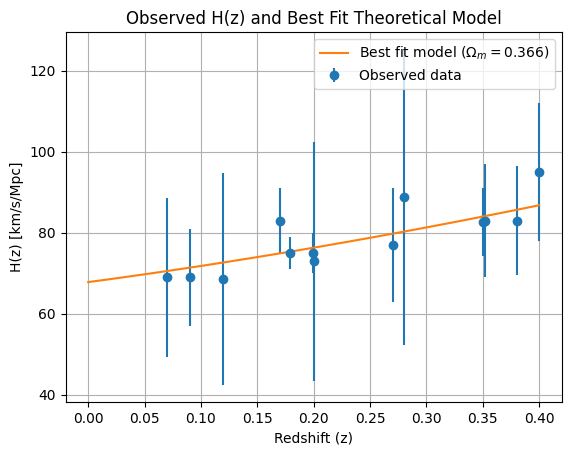

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
z = np.array([0.07, 0.09, 0.12, 0.17, 0.1791, 0.1993, 0.2, 0.27, 0.28, 0.35, 0.3519, 0.3802, 0.4])
H = np.array([69, 69, 68.6, 83, 75, 75, 72.9, 77, 88.8, 82.7, 83, 83, 95])
sigma_H = np.array([19.6, 12, 26.2, 8, 4, 5, 29.6, 14, 36.6, 8.4, 14, 13.5, 17])

# Hubble constant
H_0 = 67.8

# Theoretical model
def H_th(z, Omega_m):
    Omega_Lambda = 1 - Omega_m
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Chi-square function
def chi_square(Omega_m):
    H_theoretical = H_th(z, Omega_m)
    chi2 = np.sum(((H - H_theoretical) / sigma_H)**2)
    return chi2

# Minimize chi-square to find the best fit Omega_m
result = minimize(chi_square, x0=0.3, bounds=[(0, 1)])
best_fit_Omega_m = result.x[0]

# Generate theoretical model data for plotting
z_fine = np.linspace(0, 0.4, 100)
H_fine = H_th(z_fine, best_fit_Omega_m)

# Plotting
plt.errorbar(z, H, yerr=sigma_H, fmt='o', label='Observed data')
plt.plot(z_fine, H_fine, label=f'Best fit model ($\Omega_m = {best_fit_Omega_m:.3f}$)')
plt.xlabel('Redshift (z)')
plt.ylabel('H(z) [km/s/Mpc]')
plt.title('Observed H(z) and Best Fit Theoretical Model')
plt.legend()
plt.grid(True)
plt.show()

value of pie after 10k points

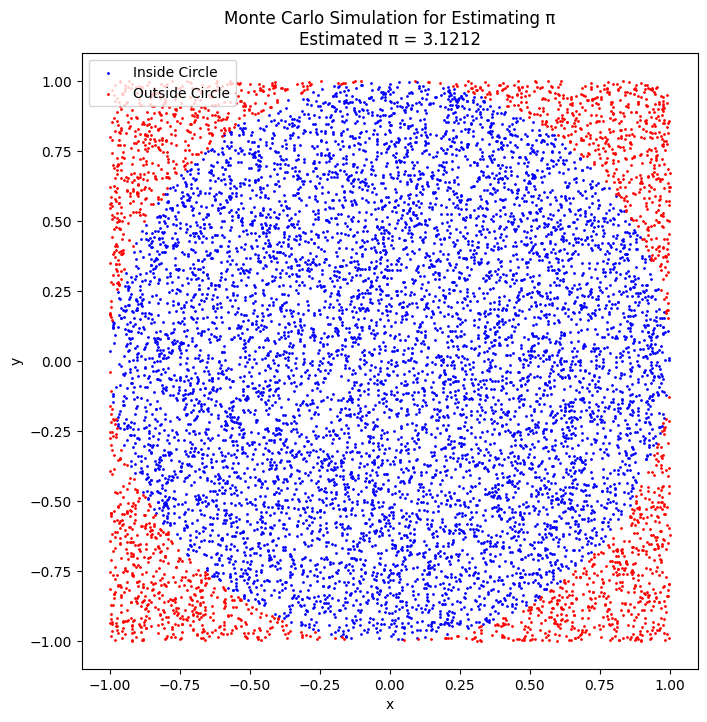

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to generate
num_points = 10000

# Generate random points in the range [-1, 1]
x = np.random.uniform(-1, 1, num_points)
y = np.random.uniform(-1, 1, num_points)

# Determine the points inside the unit circle
inside_circle = x**2 + y**2 <= 1

# Estimate π
pi_estimate = (inside_circle.sum() / num_points) * 4

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Monte Carlo Simulation for Estimating π\nEstimated π = {pi_estimate}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
